### 목표
- 인공 신경망을 통해 보스턴 주택가격 회귀 예측 진행해보기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
X,y = datasets.fetch_openml('boston', return_X_y=True)

# 기존 sklearn 버전에서는 load_boston 하면서 불러오기 가능
# 버전 업데이트 이후 datasets 자체 불러오는 함수 삭제됨
# fetch_openml() 함수를 통해 불러오기 가능

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [3]:
y.info# 회귀 예측이다.

<bound method Series.info of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64>

In [4]:
X = X.astype("float32")
y = y.astype("float32")

In [5]:
# 훈련, 테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)


In [6]:
print(X_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [7]:
# 인공신경망

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

# 뼈대 구축

model = Sequential()

# 입력층 + 중간층
# 입력할 특성 13개
model.add(Dense(units=50, input_dim=13, activation='relu'))

# 중간층
model.add(Dense(units=70 , activation='relu'))
model.add(Dense(units=50 , activation='relu'))
model.add(Dense(units=13 , activation='relu'))

# 출력층
model.add(Dense(units=1, activation='linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                700       
                                                                 
 dense_1 (Dense)             (None, 70)                3570      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 13)                663       
                                                                 
 dense_4 (Dense)             (None, 1)                 14        
                                                                 
Total params: 8,497
Trainable params: 8,497
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 학습

model.compile(loss='mse', # 평균제곱오차
              optimizer='adam')
h = model.fit(X_train,y_train,epochs=250)


Epoch 1/250
13/13 [==============================] - 2s 4ms/step - loss: 123.5451
Epoch 2/250
13/13 [==============================] - 0s 3ms/step - loss: 72.1322
Epoch 3/250
13/13 [==============================] - 0s 3ms/step - loss: 61.8899
Epoch 4/250
13/13 [==============================] - 0s 3ms/step - loss: 63.2492
Epoch 5/250
13/13 [==============================] - 0s 3ms/step - loss: 58.2853
Epoch 6/250
13/13 [==============================] - 0s 4ms/step - loss: 58.1797
Epoch 7/250
13/13 [==============================] - 0s 3ms/step - loss: 59.1902
Epoch 8/250
13/13 [==============================] - 0s 3ms/step - loss: 58.4595
Epoch 9/250
13/13 [==============================] - 0s 3ms/step - loss: 54.2149
Epoch 10/250
13/13 [==============================] - 0s 3ms/step - loss: 54.2344
Epoch 11/250
13/13 [==============================] - 0s 3ms/step - loss: 51.6662
Epoch 12/250
13/13 [==============================] - 0s 3ms/step - loss: 53.5069
Epoch 13/250
13/13 [====

In [9]:
# 평가

model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 16.9727


16.97270393371582

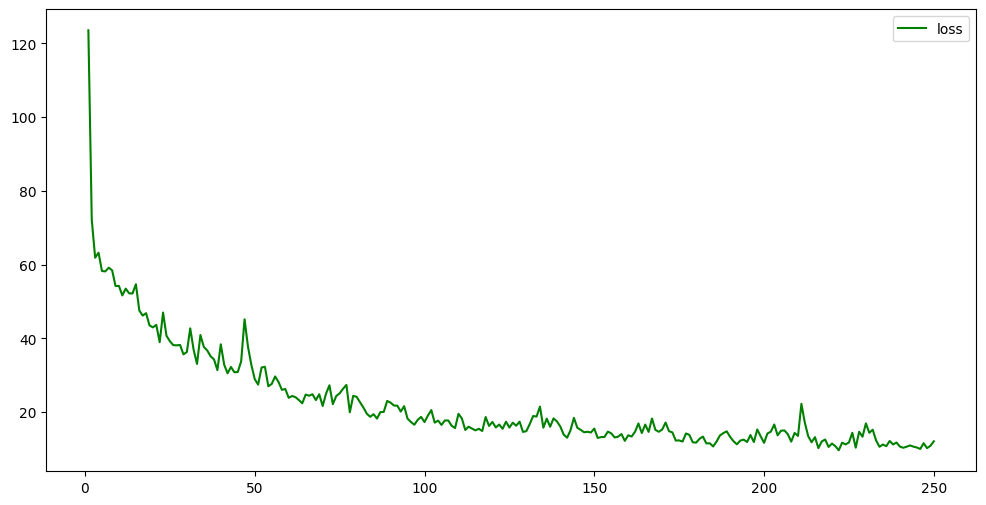

In [14]:
# 시각화
plt.figure(figsize=(12,6))
plt.plot(range(1,251), h.history['loss'], label='loss', c='green')
plt.legend()
plt.show()

In [16]:
# r2_score => 회귀 평가지표
# MSE, RMSE, MAE 
# r1 score, r2 score, 

from sklearn.metrics import r2_score
pred = model.predict(X_test)

r2_score(y_test,pred)

4/4 [==============================] - 0s 4ms/step


0.7949036737640224

In [17]:
# 1에 가까울 수록 오차가 적었음을 의미한다.
# 반복 횟수, 하이퍼 파라미터 -> 일반화가 덜 된 모델일 수 있다.
